In [1]:
# Import the required libraries.
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')

/anaconda/envs/twitter_api_practice/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
consumerKey = '9CypdRXPPfgwCf7T1vUJReO0U'
consumerSecret = 'Au1UpUTwyCCPA22YCbPT3y6JlLRzlpNYtOxWJTCy1L0JPBjS10'

#Use tweepy.OAuthHandler to create an authentication using the given key and secret
auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth)

In [4]:
#Perform a basic search query where we search for the'#Oscars2015' in the tweets
result = api.search(q='#%23NPR') #%23 is used to specify '#'

# Print the number of items returned by the search query to verify our query ran. Its 15 by default
len(result)

15

In [5]:
tweet = result[0] #Get the first tweet in the result

# Analyze the data in one tweet to see what we require
for param in dir(tweet):
#The key names beginning with an '_' are hidden ones and usually not required, so we'll skip them
    if not param.startswith("_"):
        print "%s : %s\n" % (param, eval('tweet.'+param))


author : User(follow_request_sent=None, has_extended_profile=False, profile_use_background_image=True, _json={u'follow_request_sent': None, u'has_extended_profile': False, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 17333093, u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/740618814274965505/LodDFSse.jpg', u'verified': False, u'translator_type': u'none', u'profile_text_color': u'000000', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/386460932/Marion-1_normal.jpg', u'profile_sidebar_fill_color': u'000000', u'entities': {u'description': {u'urls': []}}, u'followers_count': 965, u'profile_sidebar_border_color': u'000000', u'id_str': u'17333093', u'profile_background_color': u'000000', u'listed_count': 66, u'is_translation_enabled': False, u'utc_offset': -14400, u'statuses_count': 17089, u'description': u'Conservative biker, radio fanatic, medi-writ, film critic, Mensan, patriot, graphanalyst, r

In [7]:
results = []

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23NPR').items(500):
    results.append(tweet)

# Verify the number of items returned
print len(results)

500


In [8]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [9]:
# Let's check the top 5 records in the Data Set
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,869625818342936576,"New story from #NPR: ""A Music Video's Message ...",0,0,IFTTT,2017-05-30 18:45:26,866250776036986880,JakteOfficial,Jakte,2017-05-21 11:14:13,"Another hour with @JakteOfficial! It's May 30,...",1,0,,None
1,869625738000859136,A Music Video's Message Of Religious Tolerance...,0,0,dlvr.it,2017-05-30 18:45:07,419845598,BizFuturist,Hal Palmer,2011-11-23 21:27:38,I tweet about new #businesstrends and the view...,6110,5730,NYC/NJ,Central Time (US & Canada)
2,869625618606039041,"#NPR idiot statemt that ""religion,not islam,is...",0,0,Twitter Web Client,2017-05-30 18:44:38,17333093,dreyfus_marion,dreyfus_marion,2008-11-12 05:48:52,"Conservative biker, radio fanatic, medi-writ, ...",965,899,Global,Eastern Time (US & Canada)
3,869625323696136192,A Music Video's Message Of Religious Tolerance...,0,0,IFTTT,2017-05-30 18:43:28,2559933055,Indie_Brew,Indie Brew,2014-06-10 21:03:51,Indie Brew is a project of Jamie & Shelly; The...,977,204,Greater New York Area,None
4,869625243962363904,RT @DemocratCespool: Leftist Liberal Dems are ...,3,0,Twitter Web Client,2017-05-30 18:43:09,43682070,KeiLargo,Kei Largo,2009-05-31 12:37:28,Left & Right - NO! My message to Black America...,129,168,"iPhone: 41.736103,-87.623482",Mexico City


In [10]:
# Similarly let's check the last 2 records in the Data Set
DataSet.tail(2)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
498,869262149620711424,"#FrankDeford, @hbo @RealSportsHBO @NPR #npr #H...",0,0,Twitter for iPhone,2017-05-29 18:40:21,234516181,onelocalfamily,OneLocalFamily,2011-01-05 21:15:51,#Chatbots #AI #Startups #dad 💡Featured in @In...,1704,2810,"Scottsdale, AZ Los Angeles, CA",Arizona
499,869261962361917440,"RT @iskandrah: Frank Deford, #NPR's Longtime S...",1,0,Twitter for Android,2017-05-29 18:39:36,24782405,Aire_Apparent,Aire_Apparently,2009-03-16 22:17:58,"Writer, Script Consultant and Second-Hand Terr...",490,709,"Toronto, Ontario",Eastern Time (US & Canada)


In [11]:
# 'None' is treated as null here, so I'll remove all the records having'None' in their 'userTimezone' column
DataSet = DataSet[DataSet.userTimezone.notnull()]

# Let's also check how many records are we left with now
len(DataSet)

293

In [16]:
# puifai's gonna try to grab tweet text
DataSet2 = DataSet[DataSet.tweetText.notnull()]
len(DataSet2)

293

In [12]:
# Count the number of tweets in each time zone and get the first 10
tzs = DataSet['userTimezone'].value_counts()[:10]
print tzs

Eastern Time (US & Canada)     95
Pacific Time (US & Canada)     79
Central Time (US & Canada)     37
Tokyo                          25
Quito                           7
Mountain Time (US & Canada)     7
America/New_York                6
Atlantic Time (Canada)          6
London                          4
Arizona                         4
Name: userTimezone, dtype: int64


In [17]:
#puifai stuff
# Count the number of tweets in each time zone and get the first 10
ttx = DataSet2['tweetText'].value_counts()[:10]
print ttx

RT @LadyPatriot2000: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #P2 https:…    7
RT @IDontMissdotcom: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #P2 https:…    6
RT @DJTrump45: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #P2 https://t.co…    6
RT @LibertysHeroes: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #P2 https:/…    5
RT @VegasVictory: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #P2 https://t…    4
RT @LibertyLivesHer: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #P2 https:…    4
RT @IdiotDems: Leftist Liberal Dems are not just Idiots, they are Dangerous. #Athiest #DemFail #IdiotDems #NPR #tcot #tlot #

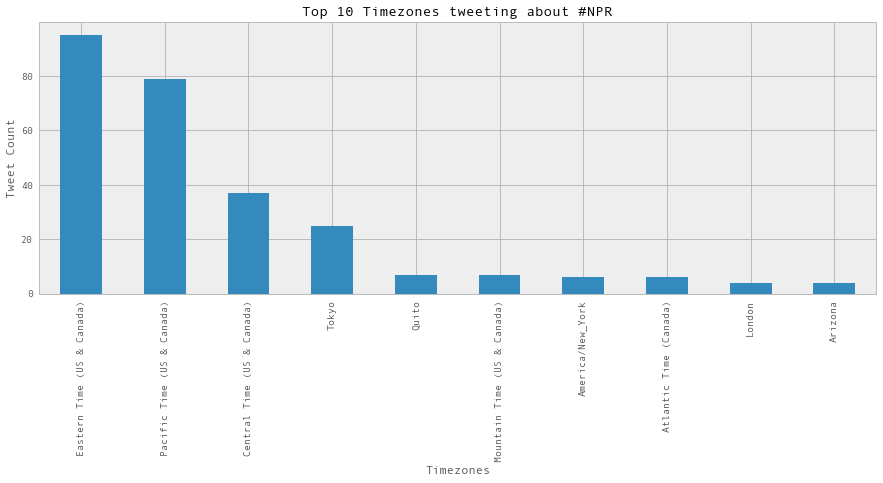

In [14]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
tzs.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #NPR')
